<a href='http://moncoachdata.com'><img src= 'https://moncoachdata.com/wp-content/uploads/MonCoachData-cours/MonCoachData.jpg' width=400/></a>


---



<center><em>Pour plus d'informations, visitez notre site <a href='http://moncoachdata.com'>moncoachdata.com</a></em></center>
<center><em>et rejoignez-nous sur <a href='https://app.moncoachdata.com/discord'>Discord</a> et <a href='https://app.moncoachdata.com/youtube'>YouTube</a></em></center>



---

# Solutions - Projet SVM (Support Vector Machines)

## Fraude dans le secteur du vin

La fraude sur le vin concerne les aspects commerciaux du vin. Le type de fraude le plus répandu est celui où les vins sont frelatés, généralement par l'ajout de produits moins chers (par exemple des jus) et parfois de produits chimiques et d'édulcorants nocifs (pour compenser la couleur ou la saveur).

La contrefaçon et le changement d'étiquette de vins de qualité inférieure et moins chers pour des marques plus coûteuses est un autre type de fraude courante.

<img src="https://moncoachdata.com/wp-content/uploads/MonCoachData-cours/wine.jpg">

## Objectifs du projet

Une société de distribution qui a récemment été victime d'une fraude a réalisé un audit de divers échantillons de vin en utilisant l'analyse chimique sur des échantillons. La société de distribution est spécialisée dans l'exportation de vins chers et de très haute qualité, mais elle a été victime d'une fraude de la part d'un fournisseur qui tentait de faire passer des vins bon marché et de faible qualité pour des vins de qualité supérieure. La société de distribution vous a engagé pour tenter de créer un modèle de Machine Learning qui puisse aider à détecter les échantillons de vin de mauvaise qualité (alias "fraude"). Elle veut savoir s'il est même possible de détecter une telle différence.


Source des données : *P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties.
In Decision Support Systems, Elsevier, 47(4):547-553, 2009.*

---
---

**TÂCHE : Votre objectif global est d'utiliser l'ensemble de données sur le vin présenté ci-dessous pour développer un modèle de Machine Learning qui tente de prédire si un vin est "légitime" ou "frauduleux" en fonction de diverses caractéristiques chimiques. Effectuez les tâches ci-dessous pour suivre le projet.**

---
---

### Effectuez les tâches en gras

## Données

**Tâche : Exécutez les cellules ci-dessous pour importer les bibliothèques et charger le dataset.**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# LECTURE CSV à éxécuter

# lecture à partir de Github pour pouvoir éxécuter le notebook sans se soucier d'importer le fichier csv
url = 'https://raw.githubusercontent.com/moncoachdata/MasterClass_DS_ML/main/wine_fraud.csv'
df = pd.read_csv(url)

# Sinon lecture classique en important sur Google Colab ou depuis le chemin exact
# df = pd.read_csv("wine_fraud.csv")

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


## Exploration des données

**Tâche : Quelles sont les variables uniques de la colonne cible que nous essayons de prédire (quality) ?**

In [ ]:
df['quality'].unique()

array(['Legit', 'Fraud'], dtype=object)

**Tâche : Créez un diagramme de comptage (countplot) qui affiche le nombre de vins par catégorie de Légitime (legit) vs. Fraude (fraud). L'étiquette cible (Label target) est-elle équilibrée ou déséquilibrée?**

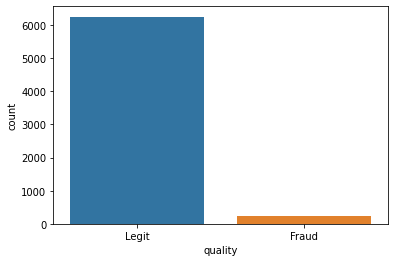

In [ ]:
sns.countplot(x='quality',data=df);

**Tâche : Cherchons à savoir s'il existe une différence entre le vin rouge et le vin blanc en matière de fraude. Créez un diagramme de comptage (countplot) avec le *type* de vin sur l'axe des x et la teinte (hue) qui sépare les colonnes en fonction de la fraude et de l'authenticité (legit).**

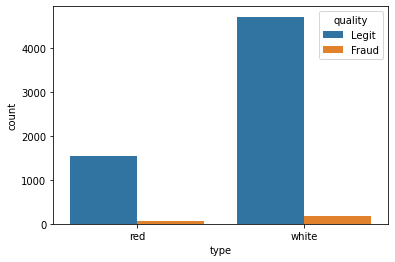

In [ ]:
sns.countplot(x='type',hue='quality',data=df);

**Tâche : Quel pourcentage de vins rouges est frauduleux ? Quel est le pourcentage de vins blancs qui sont frauduleux ?**

In [ ]:
reds = df[df["type"]=='red']

In [ ]:
whites = df[df["type"]=='white']

In [ ]:
print("Pourcentage de fraude parmi les vins rouges :")
print(100* (len(reds[reds['quality']=='Fraud'])/len(reds)))

Pourcentage de fraude parmi les vins rouges :
3.9399624765478425


In [ ]:
print("Pourcentage de fraude parmi les vins blancs :")
print(100* (len(whites[whites['quality']=='Fraud'])/len(whites)))

Pourcentage de fraude parmi les vins blancs :
3.7362188648427925


**Tâche : Calculez la corrélation entre les différentes features (caractéristiques) et la colonne "quality". Pour ce faire, vous devrez peut-être faire correspondre la colonne à 0 et 1 au lieu d'une chaîne de caractères (string).**

In [ ]:
df['Fraud']= df['quality'].map({'Legit':0,'Fraud':1})

In [ ]:
df.corr()['Fraud']

fixed acidity           0.021794
volatile acidity        0.151228
citric acid            -0.061789
residual sugar         -0.048756
chlorides               0.034499
free sulfur dioxide    -0.085204
total sulfur dioxide   -0.035252
density                 0.016351
pH                      0.020107
sulphates              -0.034046
alcohol                -0.051141
Fraud                   1.000000
Name: Fraud, dtype: float64

**Tâche : Créer un diagramme à barres des valeurs de corrélation avec le vin frauduleux.**

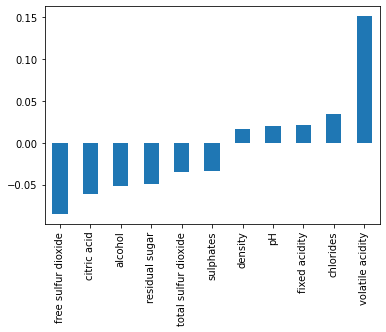

In [ ]:
df.corr()['Fraud'][:-1].sort_values().plot(kind='bar');

**Tâche : Créer une carte de clusters (clustermap) avec seaborn pour explorer les relations entre les variables.**

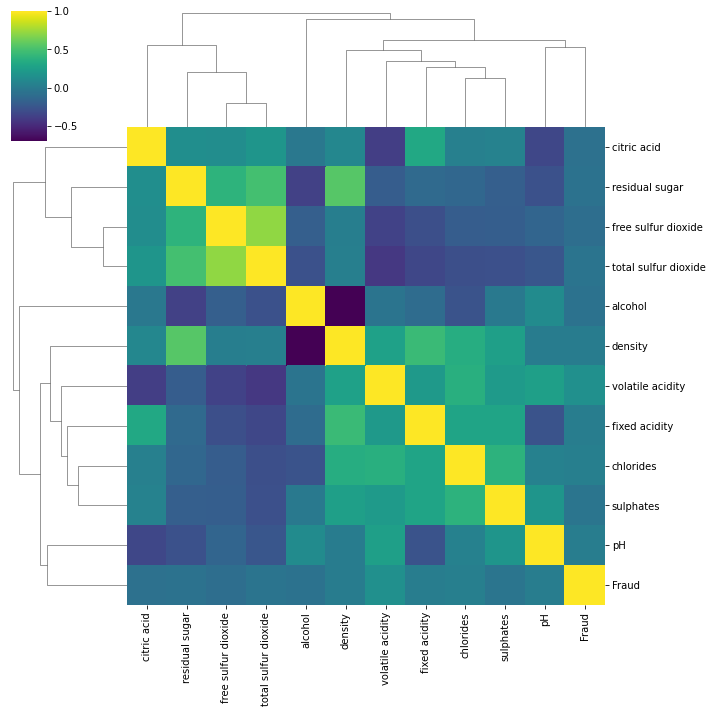

In [ ]:
sns.clustermap(df.corr(),cmap='viridis');

----
## Modèle de Machine Learning

**Tâche : Convertir la colonne catégorielle "type" en variables dummy .**

In [ ]:
df['type'] = pd.get_dummies(df['type'],drop_first=True)

In [ ]:
df = df.drop('Fraud',axis=1)

**Tâche : Séparer les données en features X et Label cible y (colonne "quality")**.

In [ ]:
X = df.drop('quality',axis=1)
y = df['quality']

**Tâche : Effectuez un fractionnement Entraînement|Test (Train Test Split) sur les données, avec une taille de test de 10%. (Note : La solution utilise un random state de 101)**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

**Tâche : Mettre à l'échelle les données X train et X test**.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

**Tâche : Créer une instance d'un classificateur de Support Vector Machine. Auparavant, nous avons laissé ce modèle "par défaut" (c'est-à-dire sans paramètres). Cependant, nous savons déjà que les classes ne sont pas équilibrées. Pour tenter d'atténuer ce problème, nous pouvons ajuster automatiquement les poids de manière inversement proportionnelle aux fréquences des classes dans les données d'entrée avec un appel d'argument dans l'appel SVC(). Consultez la [documentation du SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) en ligne et cherchez ce qu'est ce paramètre/argument.**

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc = SVC(class_weight='balanced')

**Tâche : Utiliser un GridSearchCV pour effectuer une recherche sur grille afin de trouver les meilleurs paramètres C et gamma.**

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {'C':[0.001,0.01,0.1,0.5,1],'gamma':['scale','auto']}
grid = GridSearchCV(svc,param_grid)

In [ ]:
grid.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1],
                         'gamma': ['scale', 'auto']})

In [ ]:
grid.best_params_

{'C': 1, 'gamma': 'auto'}

**Tâche : Affichez la matrice de confusion et le rapport de classification pour votre modèle.**

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
grid_pred = grid.predict(scaled_X_test)

In [ ]:
confusion_matrix(y_test,grid_pred)

array([[ 17,  10],
       [ 92, 531]])

In [ ]:
print(classification_report(y_test,grid_pred))

              precision    recall  f1-score   support

       Fraud       0.16      0.63      0.25        27
       Legit       0.98      0.85      0.91       623

    accuracy                           0.84       650
   macro avg       0.57      0.74      0.58       650
weighted avg       0.95      0.84      0.88       650



**Tâche : Enfin, réfléchissez à la performance de ce modèle, suggéreriez-vous de l'utiliser ? De façon réaliste, cela fonctionnera-t-il ?**

In [ ]:
# Voir la vidéo pour une discussion complète sur ce sujet.

**Bravo!**